In [1]:
import pandas as pd
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Eval vs non eval


def check_selector(selector_log_file):
    send_ts_selector = []
    receive_ts_selector = []
    with open(selector_log_file, "r") as file:
        for line in file:
            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_selector.append(ts)
            else:
                receive_ts_selector.append(ts)
    return send_ts_selector, receive_ts_selector

def check_trainer(trainer_log_file):
    send_ts_trainer = []
    receive_ts_trainer = []
    with open(trainer_log_file, "r") as file:
        for line in file:

            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_trainer.append(ts)
            else:
                receive_ts_trainer.append(ts)
    return send_ts_trainer, receive_ts_trainer


def check(selector_log_file, trainer_log_file):
    send_ts_trainer, receive_ts_trainer = check_trainer(trainer_log_file)
    send_ts_selector, receive_ts_selector = check_selector(selector_log_file)
    # print(len(send_ts_trainer) == len(receive_ts_selector))
    # print(f"trainer sent {len(send_ts_trainer)}")
    # print(f"selector recvd {len(receive_ts_selector)}")
    # print(len(receive_ts_trainer)==len(send_ts_selector))
    # print(f"selector sent {len(send_ts_selector)}")
    # print(f"trainer recvd {len(receive_ts_trainer)}")

    trainer_to_selector = []
    for i in range(len(send_ts_trainer)):
        trainer_to_selector.append((receive_ts_selector[i]-send_ts_trainer[i]).total_seconds())

    selector_to_trainer = []
    for i in range(len(send_ts_selector)):
        selector_to_trainer.append((receive_ts_trainer[i]-send_ts_selector[i]).total_seconds())
    return trainer_to_selector, selector_to_trainer
    
def plot(y1, y2, title):
    # Determine the maximum length of the two lists
    max_len = max(len(y1), len(y2))

    # Create an x-axis with the maximum length
    x = list(range(max_len))

    # Extend the shorter list with None or another filler value
    y1 = y1 + [None] * (max_len - len(y1))
    y2 = y2 + [None] * (max_len - len(y2))

    # Plot the two lines, handling None values gracefully
    plt.plot(x, y1, label='Eval Selector', marker='o')  # Line 1
    plt.plot(x, y2, label='Non eval selector', marker='s')  # Line 2

    # Add labels, title, and legend
    plt.xlabel('Calls')
    plt.ylabel('Time gap')
    plt.title(title)
    plt.legend()

    # Display grid
    plt.grid(True)

    # Show the plot
    plt.show()


    

        

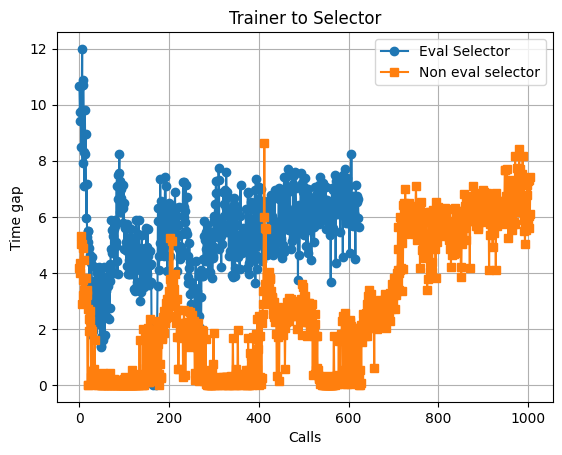

In [3]:
# slow trainer 396 - logs
# evalSelector = "evalSelectorLogs.log"
# evalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/evalTrainerLogs.log"

# fast trainer - 472 logs
evalSelector = "evalSelectorLogsFast.log"
evalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/evalTrainerLogsFast.log"

eval_trainer_to_selector, eval_selector_to_trainer = check(evalSelector, evalTrainer)



nonEvalSelector = "nonEvalSelectorLogs.log"
nonEvalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/nonEvalTrainerLogs.log"


nonEvalSelector = "nonEvalSelectorLogsFast.log"
nonEvalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/nonEvalTrainerLogsFast.log"

non_eval_trainer_to_selector, non_eval_selector_to_trainer = check(nonEvalSelector, nonEvalTrainer)
# print(eval_trainer_to_selector)
# print(non_eval_trainer_to_selector)
# print(eval_selector_to_trainer)
# print(non_eval_selector_to_trainer)
plot(eval_trainer_to_selector, non_eval_trainer_to_selector, "Trainer to Selector")

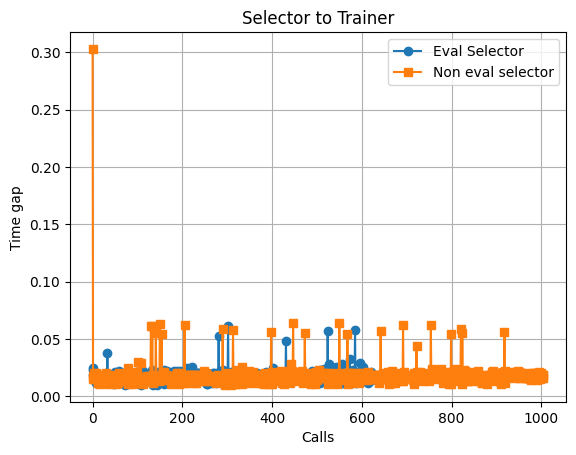

In [4]:
plot(eval_selector_to_trainer, non_eval_selector_to_trainer, "Selector to Trainer")

In [11]:
#Within eval mqtt split

def check_selector(selector_log_file):
    send_ts_selector = []
    receive_ts_selector = []
    receive_ts_mqtt = []
    prev_ts = None
    with open(selector_log_file, "r") as file:
        for line in file:
            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_selector.append(ts)
            elif re.match(r".*on_message.*", line):
                prev_ts = ts
            else:
                receive_ts_selector.append(ts)
                receive_ts_mqtt.append(prev_ts)
    return send_ts_selector, receive_ts_mqtt, receive_ts_selector

def check_trainer(trainer_log_file):
    send_ts_trainer = []
    receive_ts_mqtt = []
    receive_ts_trainer = []
    with open(trainer_log_file, "r") as file:
        for line in file:

            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_trainer.append(ts)
            elif re.match(r".*on_message.*", line):
                receive_ts_mqtt.append(ts)
            else:
                receive_ts_trainer.append(ts)
    return send_ts_trainer, receive_ts_mqtt, receive_ts_trainer


def check(selector_log_file, trainer_log_file):
    send_ts_trainer, receive_ts_mqtt_trainer, receive_ts_trainer = check_trainer(trainer_log_file)
    send_ts_selector, receive_ts_mqtt_selector, receive_ts_selector = check_selector(selector_log_file)
    print(len(send_ts_trainer) == len(receive_ts_selector) == len(receive_ts_mqtt_selector))
    print(f"trainer sent {len(send_ts_trainer)}")
    print(f"mqtt recvd {len(receive_ts_mqtt_selector)}")
    print(f"selector recvd {len(receive_ts_selector)}")
    print(len(receive_ts_trainer)==len(receive_ts_mqtt_trainer)==len(send_ts_selector))
    # print(f"selector sent {len(send_ts_selector)}")
    # print(f"trainer recvd {len(receive_ts_trainer)}")

    trainer_to_mqtt = []
    mqtt_to_selector = []
    for i in range(len(send_ts_trainer)):
        trainer_to_mqtt.append((receive_ts_mqtt_selector[i]-send_ts_trainer[i]).total_seconds())
        mqtt_to_selector.append((receive_ts_selector[i]-receive_ts_mqtt_selector[i]).total_seconds())

    selector_to_mqtt= []
    mqtt_to_trainer = []
    for i in range(len(send_ts_selector)):
        selector_to_mqtt.append((receive_ts_mqtt_trainer[i]-send_ts_selector[i]).total_seconds())
        mqtt_to_trainer.append((receive_ts_trainer[i]-receive_ts_mqtt_trainer[i]).total_seconds())
    return trainer_to_mqtt, mqtt_to_selector, selector_to_mqtt, mqtt_to_trainer
    
def plot(y1, y2, title):
    # Determine the maximum length of the two lists
    max_len = max(len(y1), len(y2))

    # Create an x-axis with the maximum length
    x = list(range(max_len))

    # Extend the shorter list with None or another filler value
    y1 = y1 + [None] * (max_len - len(y1))
    y2 = y2 + [None] * (max_len - len(y2))

    # x=x[100:]
    # y1=y1[100:]
    # y2=y2[100:]
    # Plot the two lines, handling None values gracefully
    plt.plot(x, y1, label='Sender to MQTT', marker='o')  # Line 1
    plt.plot(x, y2, label='MQTT To Receiver', marker='s')  # Line 2

    # Add labels, title, and legend
    plt.xlabel('Calls')
    plt.ylabel('Time gap')
    plt.title(title)
    plt.legend()

    # Display grid
    plt.grid(True)

    # Show the plot
    plt.show()

True
trainer sent 589
mqtt recvd 589
selector recvd 589
True


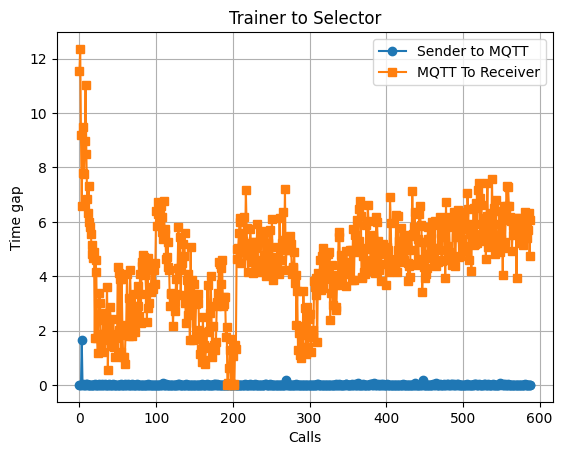

In [12]:
evalSelector = "evalSelectorLogsFast2.log"
evalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir10_num300_traceFail_6d_3state_oort/evalTrainerLogsFast2.log"

trainer_to_mqtt, mqtt_to_selector, selector_to_mqtt, mqtt_to_trainer = check(evalSelector, evalTrainer)

plot(trainer_to_mqtt, mqtt_to_selector, "Trainer to Selector")

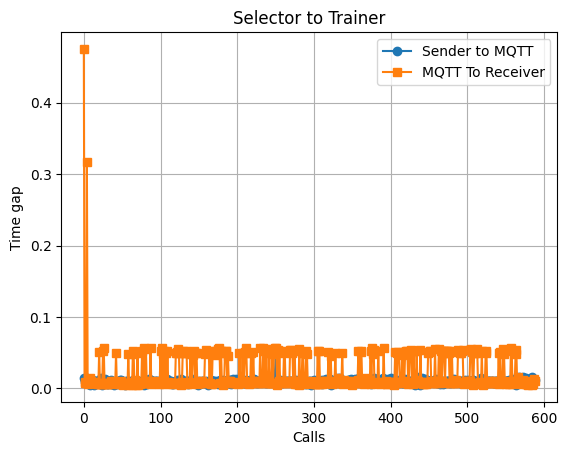

In [13]:
plot(selector_to_mqtt, mqtt_to_trainer, "Selector to Trainer")

In [18]:
#Check eval vs weight messages for MQTT to Selector

def check_selector(selector_log_file):
    send_ts_selector = []
    receive_ts_selector_eval = []
    receive_ts_selector_weight = []
    receive_ts_mqtt_eval = []
    receive_ts_mqtt_weight = []
    prev_ts = None
    with open(selector_log_file, "r") as file:
        for line in file:
            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_selector.append(ts)
            elif re.match(r".*on_message.*", line):
                prev_ts = ts
            else:
                if re.match(r'.*eval.*', line):
                    receive_ts_selector_eval.append(ts)
                    receive_ts_mqtt_eval.append(prev_ts)
                else:
                    receive_ts_selector_weight.append(ts)
                    receive_ts_mqtt_weight.append(prev_ts)

    print(len(receive_ts_selector_eval))
    print(len(receive_ts_selector_weight))

    return receive_ts_mqtt_eval, receive_ts_mqtt_weight, receive_ts_selector_eval, receive_ts_selector_weight


  

def check(selector_log_file):
    # send_ts_trainer = check_trainer(trainer_log_file)
    receive_ts_mqtt_selector_eval, receive_ts_mqtt_selector_weight, receive_ts_selector_eval, receive_ts_selector_weight = check_selector(selector_log_file)
    # print(len(send_ts_trainer) == len(receive_ts_selector) == len(receive_ts_mqtt_selector))
    # print(f"trainer sent {len(send_ts_trainer)}")
    # print(f"mqtt recvd {len(receive_ts_mqtt_selector)}")
    # print(f"selector recvd {len(receive_ts_selector)}")
    # print(len(receive_ts_trainer)==len(receive_ts_mqtt_trainer)==len(send_ts_selector))
    # print(f"selector sent {len(send_ts_selector)}")
    # print(f"trainer recvd {len(receive_ts_trainer)}")

    mqtt_to_selector_eval = []
    mqtt_to_selector_weight = []
    for i in range(len(receive_ts_mqtt_selector_eval)):
        mqtt_to_selector_eval.append((receive_ts_selector_eval[i]-receive_ts_mqtt_selector_eval[i]).total_seconds())
    for i in range(len(receive_ts_mqtt_selector_weight)):
        mqtt_to_selector_weight.append((receive_ts_selector_weight[i]-receive_ts_mqtt_selector_weight[i]).total_seconds())

    return mqtt_to_selector_eval, mqtt_to_selector_weight

def plot(y1, y2):
    # Determine the maximum length of the two lists
    max_len = max(len(y1), len(y2))

    # Create an x-axis with the maximum length
    x = list(range(max_len))

    # Extend the shorter list with None or another filler value
    y1 = y1 + [None] * (max_len - len(y1))
    y2 = y2 + [None] * (max_len - len(y2))

    # x=x[100:]
    # y1=y1[100:]
    # y2=y2[100:]
    # Plot the two lines, handling None values gracefully
    plt.plot(x, y1, label='Eval Messages', marker='o')  # Line 1
    plt.plot(x, y2, label='Non Eval Messages', marker='s')  # Line 2

    # Add labels, title, and legend
    plt.xlabel('Calls')
    plt.ylabel('Time gap')
    plt.title('MQTT To Selector')
    plt.legend()

    # Display grid
    plt.grid(True)

    # Show the plot
    plt.show()

28
561
[9.185, 7.799, 11.04, 4.94, 5.837, 5.498, 5.728, 6.079, 6.131, 3.928, 6.127, 5.961, 6.031, 5.223, 5.305, 5.768, 5.62, 5.149, 5.371, 5.575, 6.367, 5.584, 5.413, 6.034, 5.694, 6.313, 4.74, 6.071]
[11.547, 12.359, 6.578, 9.472, 7.747, 8.982, 8.512, 6.824, 6.32, 7.304, 5.975, 5.806, 5.551, 4.814, 5.141, 4.66, 4.895, 1.733, 4.58, 4.137, 1.711, 1.164, 2.433, 3.397, 3.025, 1.423, 1.858, 1.212, 2.402, 1.862, 2.661, 1.644, 2.489, 3.592, 0.564, 1.936, 2.203, 2.873, 1.538, 1.874, 1.439, 2.411, 1.394, 1.769, 1.022, 1.839, 1.712, 4.346, 4.126, 2.037, 3.887, 1.214, 3.891, 2.127, 1.022, 1.015, 0.772, 1.821, 2.218, 4.078, 2.033, 3.18, 1.801, 4.221, 2.95, 1.783, 2.762, 2.18, 2.087, 3.339, 1.963, 2.883, 2.462, 2.889, 3.622, 2.52, 4.079, 2.285, 4.364, 4.529, 4.781, 4.71, 4.084, 4.025, 3.35, 2.304, 4.668, 2.831, 2.998, 3.601, 3.418, 4.272, 4.346, 3.521, 4.232, 3.71, 4.473, 6.412, 5.838, 6.719, 6.299, 6.59, 6.165, 6.569, 5.607, 6.168, 5.38, 6.773, 5.731, 5.548, 4.63, 4.715, 5.247, 4.325, 4.239, 2.89

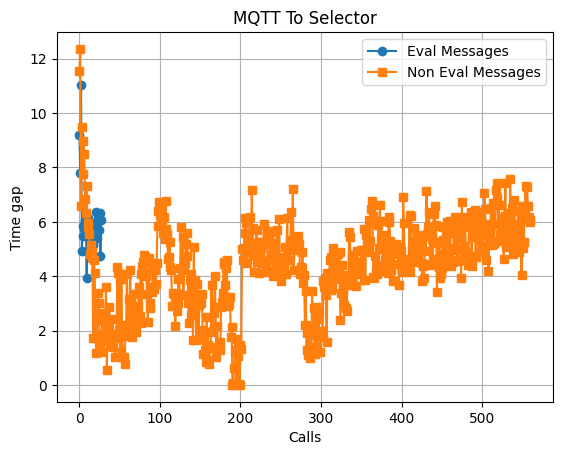

In [19]:
evalSelector = "evalSelectorLogsFast2.log"

a, b = check(evalSelector)
print(a)
print(b)
plot(a,b)

In [3]:
eval_selector_updates = {'505f9fc483cf4df68a2409257b5fad7d3c580370': 292, '505f9fc483cf4df68a2409257b5fad7d3c580372': 121, '505f9fc483cf4df68a2409257b5fad7d3c580373': 14, '505f9fc483cf4df68a2409257b5fad7d3c580374': 10, '505f9fc483cf4df68a2409257b5fad7d3c580375': 16, '505f9fc483cf4df68a2409257b5fad7d3c580376': 274, '505f9fc483cf4df68a2409257b5fad7d3c580377': 240, '505f9fc483cf4df68a2409257b5fad7d3c580379': 13, '505f9fc483cf4df68a2409257b5fad7d3c580378': 13, '505f9fc483cf4df68a2409257b5fad7d3c580380': 27, '505f9fc483cf4df68a2409257b5fad7d3c580371': 10, '505f9fc483cf4df68a2409257b5fad7d3c580382': 15, '505f9fc483cf4df68a2409257b5fad7d3c580383': 20, '505f9fc483cf4df68a2409257b5fad7d3c580381': 11, '505f9fc483cf4df68a2409257b5fad7d3c580384': 115, '505f9fc483cf4df68a2409257b5fad7d3c580385': 14, '505f9fc483cf4df68a2409257b5fad7d3c580386': 375, '505f9fc483cf4df68a2409257b5fad7d3c580387': 55, '505f9fc483cf4df68a2409257b5fad7d3c580388': 22, '505f9fc483cf4df68a2409257b5fad7d3c580390': 131, '505f9fc483cf4df68a2409257b5fad7d3c580391': 89, '505f9fc483cf4df68a2409257b5fad7d3c580389': 4, '505f9fc483cf4df68a2409257b5fad7d3c580392': 10, '505f9fc483cf4df68a2409257b5fad7d3c580393': 14, '505f9fc483cf4df68a2409257b5fad7d3c580395': 472, '505f9fc483cf4df68a2409257b5fad7d3c580394': 8, '505f9fc483cf4df68a2409257b5fad7d3c580397': 13, '505f9fc483cf4df68a2409257b5fad7d3c580396': 655, '505f9fc483cf4df68a2409257b5fad7d3c580398': 234, '505f9fc483cf4df68a2409257b5fad7d3c580401': 366, '505f9fc483cf4df68a2409257b5fad7d3c580399': 105, '505f9fc483cf4df68a2409257b5fad7d3c580402': 237, '505f9fc483cf4df68a2409257b5fad7d3c580400': 111, '505f9fc483cf4df68a2409257b5fad7d3c580403': 7, '505f9fc483cf4df68a2409257b5fad7d3c580406': 130, '505f9fc483cf4df68a2409257b5fad7d3c580405': 15, '505f9fc483cf4df68a2409257b5fad7d3c580404': 16, '505f9fc483cf4df68a2409257b5fad7d3c580407': 62, '505f9fc483cf4df68a2409257b5fad7d3c580409': 186, '505f9fc483cf4df68a2409257b5fad7d3c580408': 5, '505f9fc483cf4df68a2409257b5fad7d3c580410': 8, '505f9fc483cf4df68a2409257b5fad7d3c580411': 461, '505f9fc483cf4df68a2409257b5fad7d3c580412': 15, '505f9fc483cf4df68a2409257b5fad7d3c580413': 243, '505f9fc483cf4df68a2409257b5fad7d3c580415': 148, '505f9fc483cf4df68a2409257b5fad7d3c580414': 9, '505f9fc483cf4df68a2409257b5fad7d3c580418': 66, '505f9fc483cf4df68a2409257b5fad7d3c580416': 4, '505f9fc483cf4df68a2409257b5fad7d3c580420': 11, '505f9fc483cf4df68a2409257b5fad7d3c580417': 7, '505f9fc483cf4df68a2409257b5fad7d3c580421': 7, '505f9fc483cf4df68a2409257b5fad7d3c580423': 10, '505f9fc483cf4df68a2409257b5fad7d3c580422': 8, '505f9fc483cf4df68a2409257b5fad7d3c580419': 10, '505f9fc483cf4df68a2409257b5fad7d3c580424': 6, '505f9fc483cf4df68a2409257b5fad7d3c580425': 5, '505f9fc483cf4df68a2409257b5fad7d3c580427': 6, '505f9fc483cf4df68a2409257b5fad7d3c580426': 16, '505f9fc483cf4df68a2409257b5fad7d3c580429': 6, '505f9fc483cf4df68a2409257b5fad7d3c580428': 7, '505f9fc483cf4df68a2409257b5fad7d3c580430': 6, '505f9fc483cf4df68a2409257b5fad7d3c580431': 7, '505f9fc483cf4df68a2409257b5fad7d3c580432': 7, '505f9fc483cf4df68a2409257b5fad7d3c580434': 9, '505f9fc483cf4df68a2409257b5fad7d3c580433': 84, '505f9fc483cf4df68a2409257b5fad7d3c580437': 101, '505f9fc483cf4df68a2409257b5fad7d3c580438': 129, '505f9fc483cf4df68a2409257b5fad7d3c580439': 6, '505f9fc483cf4df68a2409257b5fad7d3c580440': 7, '505f9fc483cf4df68a2409257b5fad7d3c580436': 222, '505f9fc483cf4df68a2409257b5fad7d3c580441': 274, '505f9fc483cf4df68a2409257b5fad7d3c580435': 4, '505f9fc483cf4df68a2409257b5fad7d3c580443': 288, '505f9fc483cf4df68a2409257b5fad7d3c580442': 50, '505f9fc483cf4df68a2409257b5fad7d3c580445': 273, '505f9fc483cf4df68a2409257b5fad7d3c580444': 4, '505f9fc483cf4df68a2409257b5fad7d3c580446': 7, '505f9fc483cf4df68a2409257b5fad7d3c580447': 5, '505f9fc483cf4df68a2409257b5fad7d3c580448': 478, '505f9fc483cf4df68a2409257b5fad7d3c580449': 9, '505f9fc483cf4df68a2409257b5fad7d3c580451': 290, '505f9fc483cf4df68a2409257b5fad7d3c580450': 240, '505f9fc483cf4df68a2409257b5fad7d3c580452': 5, '505f9fc483cf4df68a2409257b5fad7d3c580453': 5, '505f9fc483cf4df68a2409257b5fad7d3c580455': 349, '505f9fc483cf4df68a2409257b5fad7d3c580454': 192, '505f9fc483cf4df68a2409257b5fad7d3c580456': 309, '505f9fc483cf4df68a2409257b5fad7d3c580458': 8, '505f9fc483cf4df68a2409257b5fad7d3c580459': 10, '505f9fc483cf4df68a2409257b5fad7d3c580457': 261, '505f9fc483cf4df68a2409257b5fad7d3c580461': 272, '505f9fc483cf4df68a2409257b5fad7d3c580463': 9, '505f9fc483cf4df68a2409257b5fad7d3c580460': 5, '505f9fc483cf4df68a2409257b5fad7d3c580462': 3, '505f9fc483cf4df68a2409257b5fad7d3c580464': 161, '505f9fc483cf4df68a2409257b5fad7d3c580465': 126, '505f9fc483cf4df68a2409257b5fad7d3c580466': 7, '505f9fc483cf4df68a2409257b5fad7d3c580467': 92, '505f9fc483cf4df68a2409257b5fad7d3c580468': 32, '505f9fc483cf4df68a2409257b5fad7d3c580470': 129, '505f9fc483cf4df68a2409257b5fad7d3c580469': 2, '505f9fc483cf4df68a2409257b5fad7d3c580471': 7, '505f9fc483cf4df68a2409257b5fad7d3c580473': 232, '505f9fc483cf4df68a2409257b5fad7d3c580474': 9, '505f9fc483cf4df68a2409257b5fad7d3c580472': 506, '505f9fc483cf4df68a2409257b5fad7d3c580475': 22, '505f9fc483cf4df68a2409257b5fad7d3c580476': 6, '505f9fc483cf4df68a2409257b5fad7d3c580477': 6, '505f9fc483cf4df68a2409257b5fad7d3c580479': 9, '505f9fc483cf4df68a2409257b5fad7d3c580478': 118, '505f9fc483cf4df68a2409257b5fad7d3c580480': 7, '505f9fc483cf4df68a2409257b5fad7d3c580481': 78, '505f9fc483cf4df68a2409257b5fad7d3c580482': 6, '505f9fc483cf4df68a2409257b5fad7d3c580483': 6, '505f9fc483cf4df68a2409257b5fad7d3c580484': 7, '505f9fc483cf4df68a2409257b5fad7d3c580486': 6, '505f9fc483cf4df68a2409257b5fad7d3c580487': 202, '505f9fc483cf4df68a2409257b5fad7d3c580488': 7, '505f9fc483cf4df68a2409257b5fad7d3c580485': 159, '505f9fc483cf4df68a2409257b5fad7d3c580489': 4, '505f9fc483cf4df68a2409257b5fad7d3c580490': 217, '505f9fc483cf4df68a2409257b5fad7d3c580492': 138, '505f9fc483cf4df68a2409257b5fad7d3c580493': 356, '505f9fc483cf4df68a2409257b5fad7d3c580491': 221, '505f9fc483cf4df68a2409257b5fad7d3c580496': 6, '505f9fc483cf4df68a2409257b5fad7d3c580494': 340, '505f9fc483cf4df68a2409257b5fad7d3c580495': 26, '505f9fc483cf4df68a2409257b5fad7d3c580497': 4, '505f9fc483cf4df68a2409257b5fad7d3c580499': 5, '505f9fc483cf4df68a2409257b5fad7d3c580498': 5, '505f9fc483cf4df68a2409257b5fad7d3c580500': 406, '505f9fc483cf4df68a2409257b5fad7d3c580501': 5, '505f9fc483cf4df68a2409257b5fad7d3c580502': 200, '505f9fc483cf4df68a2409257b5fad7d3c580503': 5, '505f9fc483cf4df68a2409257b5fad7d3c580504': 137, '505f9fc483cf4df68a2409257b5fad7d3c580505': 4, '505f9fc483cf4df68a2409257b5fad7d3c580506': 3, '505f9fc483cf4df68a2409257b5fad7d3c580508': 4, '505f9fc483cf4df68a2409257b5fad7d3c580507': 64, '505f9fc483cf4df68a2409257b5fad7d3c580509': 432, '505f9fc483cf4df68a2409257b5fad7d3c580510': 3, '505f9fc483cf4df68a2409257b5fad7d3c580511': 112, '505f9fc483cf4df68a2409257b5fad7d3c580512': 39, '505f9fc483cf4df68a2409257b5fad7d3c580513': 25, '505f9fc483cf4df68a2409257b5fad7d3c580514': 3, '505f9fc483cf4df68a2409257b5fad7d3c580515': 3, '505f9fc483cf4df68a2409257b5fad7d3c580516': 1, '505f9fc483cf4df68a2409257b5fad7d3c580517': 40, '505f9fc483cf4df68a2409257b5fad7d3c580518': 140, '505f9fc483cf4df68a2409257b5fad7d3c580519': 19, '505f9fc483cf4df68a2409257b5fad7d3c580520': 1, '505f9fc483cf4df68a2409257b5fad7d3c580521': 2, '505f9fc483cf4df68a2409257b5fad7d3c580522': 362, '505f9fc483cf4df68a2409257b5fad7d3c580523': 1, '505f9fc483cf4df68a2409257b5fad7d3c580525': 1, '505f9fc483cf4df68a2409257b5fad7d3c580524': 461, '505f9fc483cf4df68a2409257b5fad7d3c580526': 1, '505f9fc483cf4df68a2409257b5fad7d3c580530': 7, '505f9fc483cf4df68a2409257b5fad7d3c580529': 134, '505f9fc483cf4df68a2409257b5fad7d3c580533': 109, '505f9fc483cf4df68a2409257b5fad7d3c580536': 1, '505f9fc483cf4df68a2409257b5fad7d3c580541': 12, '505f9fc483cf4df68a2409257b5fad7d3c580543': 31, '505f9fc483cf4df68a2409257b5fad7d3c580552': 2, '505f9fc483cf4df68a2409257b5fad7d3c580551': 30, '505f9fc483cf4df68a2409257b5fad7d3c580557': 100, '505f9fc483cf4df68a2409257b5fad7d3c580556': 228, '505f9fc483cf4df68a2409257b5fad7d3c580560': 1, '505f9fc483cf4df68a2409257b5fad7d3c580561': 116, '505f9fc483cf4df68a2409257b5fad7d3c580562': 85, '505f9fc483cf4df68a2409257b5fad7d3c580565': 1, '505f9fc483cf4df68a2409257b5fad7d3c580569': 238, '505f9fc483cf4df68a2409257b5fad7d3c580571': 226, '505f9fc483cf4df68a2409257b5fad7d3c580572': 119, '505f9fc483cf4df68a2409257b5fad7d3c580575': 31, '505f9fc483cf4df68a2409257b5fad7d3c580576': 47, '505f9fc483cf4df68a2409257b5fad7d3c580578': 362, '505f9fc483cf4df68a2409257b5fad7d3c580586': 75, '505f9fc483cf4df68a2409257b5fad7d3c580550': 158, '505f9fc483cf4df68a2409257b5fad7d3c580574': 270, '505f9fc483cf4df68a2409257b5fad7d3c580596': 312, '505f9fc483cf4df68a2409257b5fad7d3c580598': 1, '505f9fc483cf4df68a2409257b5fad7d3c580595': 1, '505f9fc483cf4df68a2409257b5fad7d3c580601': 1, '505f9fc483cf4df68a2409257b5fad7d3c580600': 23, '505f9fc483cf4df68a2409257b5fad7d3c580580': 257, '505f9fc483cf4df68a2409257b5fad7d3c580582': 222, '505f9fc483cf4df68a2409257b5fad7d3c580607': 96, '505f9fc483cf4df68a2409257b5fad7d3c580605': 58, '505f9fc483cf4df68a2409257b5fad7d3c580608': 24, '505f9fc483cf4df68a2409257b5fad7d3c580603': 106, '505f9fc483cf4df68a2409257b5fad7d3c580632': 1, '505f9fc483cf4df68a2409257b5fad7d3c580623': 1, '505f9fc483cf4df68a2409257b5fad7d3c580644': 130, '505f9fc483cf4df68a2409257b5fad7d3c580640': 163, '505f9fc483cf4df68a2409257b5fad7d3c580626': 1, '505f9fc483cf4df68a2409257b5fad7d3c580628': 143, '505f9fc483cf4df68a2409257b5fad7d3c580610': 1, '505f9fc483cf4df68a2409257b5fad7d3c580638': 172, '505f9fc483cf4df68a2409257b5fad7d3c580639': 89, '505f9fc483cf4df68a2409257b5fad7d3c580615': 156, '505f9fc483cf4df68a2409257b5fad7d3c580648': 358, '505f9fc483cf4df68a2409257b5fad7d3c580609': 162, '505f9fc483cf4df68a2409257b5fad7d3c580663': 1, '505f9fc483cf4df68a2409257b5fad7d3c580659': 1, '505f9fc483cf4df68a2409257b5fad7d3c580658': 1, '505f9fc483cf4df68a2409257b5fad7d3c580664': 1, '505f9fc483cf4df68a2409257b5fad7d3c580665': 63, '505f9fc483cf4df68a2409257b5fad7d3c580634': 159, '505f9fc483cf4df68a2409257b5fad7d3c580650': 316, '505f9fc483cf4df68a2409257b5fad7d3c580646': 212, '505f9fc483cf4df68a2409257b5fad7d3c580614': 74, '505f9fc483cf4df68a2409257b5fad7d3c580563': 204, '505f9fc483cf4df68a2409257b5fad7d3c580602': 87, '505f9fc483cf4df68a2409257b5fad7d3c580604': 199, '505f9fc483cf4df68a2409257b5fad7d3c580660': 100, '505f9fc483cf4df68a2409257b5fad7d3c580622': 185, '505f9fc483cf4df68a2409257b5fad7d3c580538': 22, '505f9fc483cf4df68a2409257b5fad7d3c580585': 256, '505f9fc483cf4df68a2409257b5fad7d3c580540': 258, '505f9fc483cf4df68a2409257b5fad7d3c580612': 83, '505f9fc483cf4df68a2409257b5fad7d3c580588': 31, '505f9fc483cf4df68a2409257b5fad7d3c580657': 223, '505f9fc483cf4df68a2409257b5fad7d3c580627': 169, '505f9fc483cf4df68a2409257b5fad7d3c580583': 200, '505f9fc483cf4df68a2409257b5fad7d3c580547': 104, '505f9fc483cf4df68a2409257b5fad7d3c580656': 197, '505f9fc483cf4df68a2409257b5fad7d3c580597': 194, '505f9fc483cf4df68a2409257b5fad7d3c580570': 146, '505f9fc483cf4df68a2409257b5fad7d3c580669': 153, '505f9fc483cf4df68a2409257b5fad7d3c580613': 171, '505f9fc483cf4df68a2409257b5fad7d3c580546': 158, '505f9fc483cf4df68a2409257b5fad7d3c580654': 111, '505f9fc483cf4df68a2409257b5fad7d3c580553': 70, '505f9fc483cf4df68a2409257b5fad7d3c580643': 98, '505f9fc483cf4df68a2409257b5fad7d3c580631': 55, '505f9fc483cf4df68a2409257b5fad7d3c580531': 67, '505f9fc483cf4df68a2409257b5fad7d3c580591': 53, '505f9fc483cf4df68a2409257b5fad7d3c580667': 33, '505f9fc483cf4df68a2409257b5fad7d3c580666': 16, '505f9fc483cf4df68a2409257b5fad7d3c580621': 33, '505f9fc483cf4df68a2409257b5fad7d3c580637': 26, '505f9fc483cf4df68a2409257b5fad7d3c580611': 13, '505f9fc483cf4df68a2409257b5fad7d3c580649': 11, '505f9fc483cf4df68a2409257b5fad7d3c580624': 9}
non_eval_selector_updates = {'505f9fc483cf4df68a2409257b5fad7d3c580370': 544, '505f9fc483cf4df68a2409257b5fad7d3c580371': 10, '505f9fc483cf4df68a2409257b5fad7d3c580372': 170, '505f9fc483cf4df68a2409257b5fad7d3c580373': 17, '505f9fc483cf4df68a2409257b5fad7d3c580375': 19, '505f9fc483cf4df68a2409257b5fad7d3c580374': 10, '505f9fc483cf4df68a2409257b5fad7d3c580376': 415, '505f9fc483cf4df68a2409257b5fad7d3c580377': 330, '505f9fc483cf4df68a2409257b5fad7d3c580379': 16, '505f9fc483cf4df68a2409257b5fad7d3c580378': 15, '505f9fc483cf4df68a2409257b5fad7d3c580380': 26, '505f9fc483cf4df68a2409257b5fad7d3c580381': 11, '505f9fc483cf4df68a2409257b5fad7d3c580382': 16, '505f9fc483cf4df68a2409257b5fad7d3c580383': 27, '505f9fc483cf4df68a2409257b5fad7d3c580384': 182, '505f9fc483cf4df68a2409257b5fad7d3c580385': 13, '505f9fc483cf4df68a2409257b5fad7d3c580386': 655, '505f9fc483cf4df68a2409257b5fad7d3c580387': 63, '505f9fc483cf4df68a2409257b5fad7d3c580388': 28, '505f9fc483cf4df68a2409257b5fad7d3c580390': 231, '505f9fc483cf4df68a2409257b5fad7d3c580391': 140, '505f9fc483cf4df68a2409257b5fad7d3c580389': 5, '505f9fc483cf4df68a2409257b5fad7d3c580393': 14, '505f9fc483cf4df68a2409257b5fad7d3c580392': 10, '505f9fc483cf4df68a2409257b5fad7d3c580395': 783, '505f9fc483cf4df68a2409257b5fad7d3c580394': 12, '505f9fc483cf4df68a2409257b5fad7d3c580396': 916, '505f9fc483cf4df68a2409257b5fad7d3c580397': 15, '505f9fc483cf4df68a2409257b5fad7d3c580398': 358, '505f9fc483cf4df68a2409257b5fad7d3c580399': 168, '505f9fc483cf4df68a2409257b5fad7d3c580400': 235, '505f9fc483cf4df68a2409257b5fad7d3c580401': 618, '505f9fc483cf4df68a2409257b5fad7d3c580402': 390, '505f9fc483cf4df68a2409257b5fad7d3c580404': 15, '505f9fc483cf4df68a2409257b5fad7d3c580403': 9, '505f9fc483cf4df68a2409257b5fad7d3c580405': 23, '505f9fc483cf4df68a2409257b5fad7d3c580406': 173, '505f9fc483cf4df68a2409257b5fad7d3c580407': 96, '505f9fc483cf4df68a2409257b5fad7d3c580409': 299, '505f9fc483cf4df68a2409257b5fad7d3c580408': 10, '505f9fc483cf4df68a2409257b5fad7d3c580410': 9, '505f9fc483cf4df68a2409257b5fad7d3c580411': 944, '505f9fc483cf4df68a2409257b5fad7d3c580412': 22, '505f9fc483cf4df68a2409257b5fad7d3c580413': 427, '505f9fc483cf4df68a2409257b5fad7d3c580414': 11, '505f9fc483cf4df68a2409257b5fad7d3c580416': 19, '505f9fc483cf4df68a2409257b5fad7d3c580415': 217, '505f9fc483cf4df68a2409257b5fad7d3c580417': 16, '505f9fc483cf4df68a2409257b5fad7d3c580418': 94, '505f9fc483cf4df68a2409257b5fad7d3c580419': 13, '505f9fc483cf4df68a2409257b5fad7d3c580420': 17, '505f9fc483cf4df68a2409257b5fad7d3c580421': 11, '505f9fc483cf4df68a2409257b5fad7d3c580422': 11, '505f9fc483cf4df68a2409257b5fad7d3c580423': 18, '505f9fc483cf4df68a2409257b5fad7d3c580424': 11, '505f9fc483cf4df68a2409257b5fad7d3c580425': 9, '505f9fc483cf4df68a2409257b5fad7d3c580426': 17, '505f9fc483cf4df68a2409257b5fad7d3c580427': 8, '505f9fc483cf4df68a2409257b5fad7d3c580429': 12, '505f9fc483cf4df68a2409257b5fad7d3c580430': 15, '505f9fc483cf4df68a2409257b5fad7d3c580428': 8, '505f9fc483cf4df68a2409257b5fad7d3c580431': 19, '505f9fc483cf4df68a2409257b5fad7d3c580432': 13, '505f9fc483cf4df68a2409257b5fad7d3c580434': 19, '505f9fc483cf4df68a2409257b5fad7d3c580433': 112, '505f9fc483cf4df68a2409257b5fad7d3c580436': 362, '505f9fc483cf4df68a2409257b5fad7d3c580435': 8, '505f9fc483cf4df68a2409257b5fad7d3c580437': 167, '505f9fc483cf4df68a2409257b5fad7d3c580438': 173, '505f9fc483cf4df68a2409257b5fad7d3c580439': 15, '505f9fc483cf4df68a2409257b5fad7d3c580440': 15, '505f9fc483cf4df68a2409257b5fad7d3c580441': 464, '505f9fc483cf4df68a2409257b5fad7d3c580443': 504, '505f9fc483cf4df68a2409257b5fad7d3c580442': 79, '505f9fc483cf4df68a2409257b5fad7d3c580445': 462, '505f9fc483cf4df68a2409257b5fad7d3c580444': 7, '505f9fc483cf4df68a2409257b5fad7d3c580446': 13, '505f9fc483cf4df68a2409257b5fad7d3c580447': 8, '505f9fc483cf4df68a2409257b5fad7d3c580449': 15, '505f9fc483cf4df68a2409257b5fad7d3c580448': 699, '505f9fc483cf4df68a2409257b5fad7d3c580451': 481, '505f9fc483cf4df68a2409257b5fad7d3c580450': 281, '505f9fc483cf4df68a2409257b5fad7d3c580452': 9, '505f9fc483cf4df68a2409257b5fad7d3c580453': 10, '505f9fc483cf4df68a2409257b5fad7d3c580455': 601, '505f9fc483cf4df68a2409257b5fad7d3c580454': 167, '505f9fc483cf4df68a2409257b5fad7d3c580456': 404, '505f9fc483cf4df68a2409257b5fad7d3c580457': 447, '505f9fc483cf4df68a2409257b5fad7d3c580458': 16, '505f9fc483cf4df68a2409257b5fad7d3c580459': 13, '505f9fc483cf4df68a2409257b5fad7d3c580461': 455, '505f9fc483cf4df68a2409257b5fad7d3c580460': 6, '505f9fc483cf4df68a2409257b5fad7d3c580463': 16, '505f9fc483cf4df68a2409257b5fad7d3c580462': 7, '505f9fc483cf4df68a2409257b5fad7d3c580464': 236, '505f9fc483cf4df68a2409257b5fad7d3c580465': 179, '505f9fc483cf4df68a2409257b5fad7d3c580466': 16, '505f9fc483cf4df68a2409257b5fad7d3c580467': 167, '505f9fc483cf4df68a2409257b5fad7d3c580468': 29, '505f9fc483cf4df68a2409257b5fad7d3c580470': 204, '505f9fc483cf4df68a2409257b5fad7d3c580469': 6, '505f9fc483cf4df68a2409257b5fad7d3c580472': 1006, '505f9fc483cf4df68a2409257b5fad7d3c580471': 8, '505f9fc483cf4df68a2409257b5fad7d3c580474': 16, '505f9fc483cf4df68a2409257b5fad7d3c580473': 215, '505f9fc483cf4df68a2409257b5fad7d3c580476': 11, '505f9fc483cf4df68a2409257b5fad7d3c580475': 33, '505f9fc483cf4df68a2409257b5fad7d3c580477': 13, '505f9fc483cf4df68a2409257b5fad7d3c580479': 12, '505f9fc483cf4df68a2409257b5fad7d3c580478': 146, '505f9fc483cf4df68a2409257b5fad7d3c580480': 12, '505f9fc483cf4df68a2409257b5fad7d3c580481': 120, '505f9fc483cf4df68a2409257b5fad7d3c580482': 8, '505f9fc483cf4df68a2409257b5fad7d3c580483': 11, '505f9fc483cf4df68a2409257b5fad7d3c580484': 14, '505f9fc483cf4df68a2409257b5fad7d3c580485': 177, '505f9fc483cf4df68a2409257b5fad7d3c580486': 12, '505f9fc483cf4df68a2409257b5fad7d3c580487': 326, '505f9fc483cf4df68a2409257b5fad7d3c580488': 15, '505f9fc483cf4df68a2409257b5fad7d3c580489': 10, '505f9fc483cf4df68a2409257b5fad7d3c580490': 352, '505f9fc483cf4df68a2409257b5fad7d3c580491': 184, '505f9fc483cf4df68a2409257b5fad7d3c580492': 247, '505f9fc483cf4df68a2409257b5fad7d3c580493': 587, '505f9fc483cf4df68a2409257b5fad7d3c580494': 551, '505f9fc483cf4df68a2409257b5fad7d3c580495': 51, '505f9fc483cf4df68a2409257b5fad7d3c580496': 15, '505f9fc483cf4df68a2409257b5fad7d3c580497': 8, '505f9fc483cf4df68a2409257b5fad7d3c580498': 6, '505f9fc483cf4df68a2409257b5fad7d3c580499': 6, '505f9fc483cf4df68a2409257b5fad7d3c580500': 561, '505f9fc483cf4df68a2409257b5fad7d3c580501': 7, '505f9fc483cf4df68a2409257b5fad7d3c580502': 465, '505f9fc483cf4df68a2409257b5fad7d3c580503': 7, '505f9fc483cf4df68a2409257b5fad7d3c580504': 205, '505f9fc483cf4df68a2409257b5fad7d3c580505': 6, '505f9fc483cf4df68a2409257b5fad7d3c580506': 4, '505f9fc483cf4df68a2409257b5fad7d3c580507': 97, '505f9fc483cf4df68a2409257b5fad7d3c580508': 8, '505f9fc483cf4df68a2409257b5fad7d3c580509': 707, '505f9fc483cf4df68a2409257b5fad7d3c580510': 3, '505f9fc483cf4df68a2409257b5fad7d3c580511': 162, '505f9fc483cf4df68a2409257b5fad7d3c580512': 53, '505f9fc483cf4df68a2409257b5fad7d3c580513': 37, '505f9fc483cf4df68a2409257b5fad7d3c580514': 6, '505f9fc483cf4df68a2409257b5fad7d3c580515': 4, '505f9fc483cf4df68a2409257b5fad7d3c580518': 240, '505f9fc483cf4df68a2409257b5fad7d3c580516': 1, '505f9fc483cf4df68a2409257b5fad7d3c580517': 68, '505f9fc483cf4df68a2409257b5fad7d3c580519': 25, '505f9fc483cf4df68a2409257b5fad7d3c580520': 1, '505f9fc483cf4df68a2409257b5fad7d3c580521': 2, '505f9fc483cf4df68a2409257b5fad7d3c580522': 489, '505f9fc483cf4df68a2409257b5fad7d3c580524': 686, '505f9fc483cf4df68a2409257b5fad7d3c580529': 210, '505f9fc483cf4df68a2409257b5fad7d3c580530': 14, '505f9fc483cf4df68a2409257b5fad7d3c580533': 195, '505f9fc483cf4df68a2409257b5fad7d3c580536': 1, '505f9fc483cf4df68a2409257b5fad7d3c580541': 8, '505f9fc483cf4df68a2409257b5fad7d3c580543': 43, '505f9fc483cf4df68a2409257b5fad7d3c580552': 2, '505f9fc483cf4df68a2409257b5fad7d3c580551': 42, '505f9fc483cf4df68a2409257b5fad7d3c580557': 217, '505f9fc483cf4df68a2409257b5fad7d3c580556': 298, '505f9fc483cf4df68a2409257b5fad7d3c580560': 1, '505f9fc483cf4df68a2409257b5fad7d3c580562': 145, '505f9fc483cf4df68a2409257b5fad7d3c580561': 162, '505f9fc483cf4df68a2409257b5fad7d3c580565': 1, '505f9fc483cf4df68a2409257b5fad7d3c580572': 245, '505f9fc483cf4df68a2409257b5fad7d3c580571': 421, '505f9fc483cf4df68a2409257b5fad7d3c580569': 424, '505f9fc483cf4df68a2409257b5fad7d3c580575': 71, '505f9fc483cf4df68a2409257b5fad7d3c580576': 57, '505f9fc483cf4df68a2409257b5fad7d3c580578': 591, '505f9fc483cf4df68a2409257b5fad7d3c580586': 97, '505f9fc483cf4df68a2409257b5fad7d3c580550': 188, '505f9fc483cf4df68a2409257b5fad7d3c580574': 355, '505f9fc483cf4df68a2409257b5fad7d3c580595': 1, '505f9fc483cf4df68a2409257b5fad7d3c580596': 531, '505f9fc483cf4df68a2409257b5fad7d3c580598': 1, '505f9fc483cf4df68a2409257b5fad7d3c580580': 482, '505f9fc483cf4df68a2409257b5fad7d3c580601': 1, '505f9fc483cf4df68a2409257b5fad7d3c580582': 353, '505f9fc483cf4df68a2409257b5fad7d3c580608': 38, '505f9fc483cf4df68a2409257b5fad7d3c580605': 74, '505f9fc483cf4df68a2409257b5fad7d3c580610': 1, '505f9fc483cf4df68a2409257b5fad7d3c580603': 171, '505f9fc483cf4df68a2409257b5fad7d3c580607': 148, '505f9fc483cf4df68a2409257b5fad7d3c580600': 36, '505f9fc483cf4df68a2409257b5fad7d3c580602': 101, '505f9fc483cf4df68a2409257b5fad7d3c580609': 314, '505f9fc483cf4df68a2409257b5fad7d3c580615': 285, '505f9fc483cf4df68a2409257b5fad7d3c580648': 645, '505f9fc483cf4df68a2409257b5fad7d3c580640': 267, '505f9fc483cf4df68a2409257b5fad7d3c580644': 233, '505f9fc483cf4df68a2409257b5fad7d3c580626': 1, '505f9fc483cf4df68a2409257b5fad7d3c580623': 1, '505f9fc483cf4df68a2409257b5fad7d3c580638': 282, '505f9fc483cf4df68a2409257b5fad7d3c580632': 1, '505f9fc483cf4df68a2409257b5fad7d3c580628': 209, '505f9fc483cf4df68a2409257b5fad7d3c580639': 153, '505f9fc483cf4df68a2409257b5fad7d3c580643': 158, '505f9fc483cf4df68a2409257b5fad7d3c580633': 1, '505f9fc483cf4df68a2409257b5fad7d3c580641': 1, '505f9fc483cf4df68a2409257b5fad7d3c580658': 1, '505f9fc483cf4df68a2409257b5fad7d3c580665': 97, '505f9fc483cf4df68a2409257b5fad7d3c580659': 1, '505f9fc483cf4df68a2409257b5fad7d3c580664': 1, '505f9fc483cf4df68a2409257b5fad7d3c580663': 1, '505f9fc483cf4df68a2409257b5fad7d3c580634': 220, '505f9fc483cf4df68a2409257b5fad7d3c580650': 588, '505f9fc483cf4df68a2409257b5fad7d3c580646': 342, '505f9fc483cf4df68a2409257b5fad7d3c580614': 107, '505f9fc483cf4df68a2409257b5fad7d3c580563': 360, '505f9fc483cf4df68a2409257b5fad7d3c580604': 341, '505f9fc483cf4df68a2409257b5fad7d3c580660': 128, '505f9fc483cf4df68a2409257b5fad7d3c580622': 255, '505f9fc483cf4df68a2409257b5fad7d3c580538': 30, '505f9fc483cf4df68a2409257b5fad7d3c580585': 460, '505f9fc483cf4df68a2409257b5fad7d3c580540': 398, '505f9fc483cf4df68a2409257b5fad7d3c580588': 56, '505f9fc483cf4df68a2409257b5fad7d3c580612': 142, '505f9fc483cf4df68a2409257b5fad7d3c580657': 374, '505f9fc483cf4df68a2409257b5fad7d3c580627': 218, '505f9fc483cf4df68a2409257b5fad7d3c580583': 331, '505f9fc483cf4df68a2409257b5fad7d3c580547': 158, '505f9fc483cf4df68a2409257b5fad7d3c580579': 132, '505f9fc483cf4df68a2409257b5fad7d3c580656': 299, '505f9fc483cf4df68a2409257b5fad7d3c580597': 334, '505f9fc483cf4df68a2409257b5fad7d3c580570': 222, '505f9fc483cf4df68a2409257b5fad7d3c580669': 237, '505f9fc483cf4df68a2409257b5fad7d3c580613': 267, '505f9fc483cf4df68a2409257b5fad7d3c580546': 239, '505f9fc483cf4df68a2409257b5fad7d3c580654': 125, '505f9fc483cf4df68a2409257b5fad7d3c580553': 121, '505f9fc483cf4df68a2409257b5fad7d3c580631': 77, '505f9fc483cf4df68a2409257b5fad7d3c580531': 85, '505f9fc483cf4df68a2409257b5fad7d3c580591': 71, '505f9fc483cf4df68a2409257b5fad7d3c580667': 37, '505f9fc483cf4df68a2409257b5fad7d3c580621': 43, '505f9fc483cf4df68a2409257b5fad7d3c580666': 22, '505f9fc483cf4df68a2409257b5fad7d3c580637': 26, '505f9fc483cf4df68a2409257b5fad7d3c580611': 11, '505f9fc483cf4df68a2409257b5fad7d3c580624': 6, '505f9fc483cf4df68a2409257b5fad7d3c580649': 4}



result = {
    key: eval_selector_updates[key] + non_eval_selector_updates[key]
    for key in eval_selector_updates.keys() & non_eval_selector_updates.keys()
}

top_key = max(result, key=result.get)

eval_max = max(eval_selector_updates, key=eval_selector_updates.get)
non_eval_max = max(non_eval_selector_updates, key=non_eval_selector_updates.get)

print(top_key)
print(eval_selector_updates['505f9fc483cf4df68a2409257b5fad7d3c580472'])
# print(non_eval_max)
print(non_eval_selector_updates[non_eval_max])
print(eval_selector_updates['505f9fc483cf4df68a2409257b5fad7d3c580396'])
print(non_eval_selector_updates['505f9fc483cf4df68a2409257b5fad7d3c580396'])





eval_updates2 = {'505f9fc483cf4df68a2409257b5fad7d3c580370': 270, '505f9fc483cf4df68a2409257b5fad7d3c580373': 12, '505f9fc483cf4df68a2409257b5fad7d3c580377': 83, '505f9fc483cf4df68a2409257b5fad7d3c580378': 9, '505f9fc483cf4df68a2409257b5fad7d3c580380': 12, '505f9fc483cf4df68a2409257b5fad7d3c580379': 12, '505f9fc483cf4df68a2409257b5fad7d3c580381': 12, '505f9fc483cf4df68a2409257b5fad7d3c580383': 24, '505f9fc483cf4df68a2409257b5fad7d3c580382': 14, '505f9fc483cf4df68a2409257b5fad7d3c580384': 86, '505f9fc483cf4df68a2409257b5fad7d3c580376': 130, '505f9fc483cf4df68a2409257b5fad7d3c580371': 8, '505f9fc483cf4df68a2409257b5fad7d3c580375': 15, '505f9fc483cf4df68a2409257b5fad7d3c580372': 88, '505f9fc483cf4df68a2409257b5fad7d3c580374': 8, '505f9fc483cf4df68a2409257b5fad7d3c580385': 13, '505f9fc483cf4df68a2409257b5fad7d3c580386': 231, '505f9fc483cf4df68a2409257b5fad7d3c580387': 14, '505f9fc483cf4df68a2409257b5fad7d3c580388': 22, '505f9fc483cf4df68a2409257b5fad7d3c580390': 132, '505f9fc483cf4df68a2409257b5fad7d3c580391': 97, '505f9fc483cf4df68a2409257b5fad7d3c580393': 12, '505f9fc483cf4df68a2409257b5fad7d3c580392': 10, '505f9fc483cf4df68a2409257b5fad7d3c580389': 4, '505f9fc483cf4df68a2409257b5fad7d3c580394': 12, '505f9fc483cf4df68a2409257b5fad7d3c580395': 308, '505f9fc483cf4df68a2409257b5fad7d3c580396': 490, '505f9fc483cf4df68a2409257b5fad7d3c580397': 15, '505f9fc483cf4df68a2409257b5fad7d3c580398': 96, '505f9fc483cf4df68a2409257b5fad7d3c580399': 13, '505f9fc483cf4df68a2409257b5fad7d3c580400': 131, '505f9fc483cf4df68a2409257b5fad7d3c580401': 384, '505f9fc483cf4df68a2409257b5fad7d3c580402': 85, '505f9fc483cf4df68a2409257b5fad7d3c580404': 15, '505f9fc483cf4df68a2409257b5fad7d3c580403': 7, '505f9fc483cf4df68a2409257b5fad7d3c580405': 10, '505f9fc483cf4df68a2409257b5fad7d3c580406': 121, '505f9fc483cf4df68a2409257b5fad7d3c580409': 68, '505f9fc483cf4df68a2409257b5fad7d3c580408': 8, '505f9fc483cf4df68a2409257b5fad7d3c580407': 70, '505f9fc483cf4df68a2409257b5fad7d3c580410': 4, '505f9fc483cf4df68a2409257b5fad7d3c580411': 318, '505f9fc483cf4df68a2409257b5fad7d3c580412': 17, '505f9fc483cf4df68a2409257b5fad7d3c580413': 257, '505f9fc483cf4df68a2409257b5fad7d3c580414': 6, '505f9fc483cf4df68a2409257b5fad7d3c580416': 11, '505f9fc483cf4df68a2409257b5fad7d3c580415': 40, '505f9fc483cf4df68a2409257b5fad7d3c580417': 6, '505f9fc483cf4df68a2409257b5fad7d3c580418': 84, '505f9fc483cf4df68a2409257b5fad7d3c580419': 7, '505f9fc483cf4df68a2409257b5fad7d3c580420': 10, '505f9fc483cf4df68a2409257b5fad7d3c580421': 6, '505f9fc483cf4df68a2409257b5fad7d3c580423': 7, '505f9fc483cf4df68a2409257b5fad7d3c580422': 8, '505f9fc483cf4df68a2409257b5fad7d3c580424': 7, '505f9fc483cf4df68a2409257b5fad7d3c580425': 7, '505f9fc483cf4df68a2409257b5fad7d3c580426': 17, '505f9fc483cf4df68a2409257b5fad7d3c580427': 4, '505f9fc483cf4df68a2409257b5fad7d3c580429': 6, '505f9fc483cf4df68a2409257b5fad7d3c580430': 5, '505f9fc483cf4df68a2409257b5fad7d3c580428': 4, '505f9fc483cf4df68a2409257b5fad7d3c580431': 6, '505f9fc483cf4df68a2409257b5fad7d3c580432': 7, '505f9fc483cf4df68a2409257b5fad7d3c580434': 7, '505f9fc483cf4df68a2409257b5fad7d3c580433': 6, '505f9fc483cf4df68a2409257b5fad7d3c580436': 130, '505f9fc483cf4df68a2409257b5fad7d3c580437': 6, '505f9fc483cf4df68a2409257b5fad7d3c580438': 91, '505f9fc483cf4df68a2409257b5fad7d3c580439': 6, '505f9fc483cf4df68a2409257b5fad7d3c580440': 9, '505f9fc483cf4df68a2409257b5fad7d3c580441': 242, '505f9fc483cf4df68a2409257b5fad7d3c580435': 8, '505f9fc483cf4df68a2409257b5fad7d3c580443': 152, '505f9fc483cf4df68a2409257b5fad7d3c580442': 49, '505f9fc483cf4df68a2409257b5fad7d3c580445': 140, '505f9fc483cf4df68a2409257b5fad7d3c580444': 5, '505f9fc483cf4df68a2409257b5fad7d3c580446': 6, '505f9fc483cf4df68a2409257b5fad7d3c580447': 6, '505f9fc483cf4df68a2409257b5fad7d3c580448': 339, '505f9fc483cf4df68a2409257b5fad7d3c580449': 7, '505f9fc483cf4df68a2409257b5fad7d3c580451': 166, '505f9fc483cf4df68a2409257b5fad7d3c580450': 236, '505f9fc483cf4df68a2409257b5fad7d3c580452': 5, '505f9fc483cf4df68a2409257b5fad7d3c580453': 7, '505f9fc483cf4df68a2409257b5fad7d3c580455': 199, '505f9fc483cf4df68a2409257b5fad7d3c580454': 192, '505f9fc483cf4df68a2409257b5fad7d3c580456': 287, '505f9fc483cf4df68a2409257b5fad7d3c580457': 279, '505f9fc483cf4df68a2409257b5fad7d3c580458': 8, '505f9fc483cf4df68a2409257b5fad7d3c580459': 6, '505f9fc483cf4df68a2409257b5fad7d3c580461': 204, '505f9fc483cf4df68a2409257b5fad7d3c580463': 6, '505f9fc483cf4df68a2409257b5fad7d3c580460': 4, '505f9fc483cf4df68a2409257b5fad7d3c580462': 7, '505f9fc483cf4df68a2409257b5fad7d3c580464': 7, '505f9fc483cf4df68a2409257b5fad7d3c580465': 130, '505f9fc483cf4df68a2409257b5fad7d3c580466': 9, '505f9fc483cf4df68a2409257b5fad7d3c580467': 85, '505f9fc483cf4df68a2409257b5fad7d3c580468': 19, '505f9fc483cf4df68a2409257b5fad7d3c580470': 8, '505f9fc483cf4df68a2409257b5fad7d3c580469': 5, '505f9fc483cf4df68a2409257b5fad7d3c580471': 4, '505f9fc483cf4df68a2409257b5fad7d3c580472': 561, '505f9fc483cf4df68a2409257b5fad7d3c580474': 8, '505f9fc483cf4df68a2409257b5fad7d3c580473': 155, '505f9fc483cf4df68a2409257b5fad7d3c580476': 6, '505f9fc483cf4df68a2409257b5fad7d3c580475': 6, '505f9fc483cf4df68a2409257b5fad7d3c580477': 7, '505f9fc483cf4df68a2409257b5fad7d3c580479': 8, '505f9fc483cf4df68a2409257b5fad7d3c580478': 41, '505f9fc483cf4df68a2409257b5fad7d3c580480': 8, '505f9fc483cf4df68a2409257b5fad7d3c580481': 8, '505f9fc483cf4df68a2409257b5fad7d3c580482': 6, '505f9fc483cf4df68a2409257b5fad7d3c580483': 5, '505f9fc483cf4df68a2409257b5fad7d3c580484': 7, '505f9fc483cf4df68a2409257b5fad7d3c580486': 9, '505f9fc483cf4df68a2409257b5fad7d3c580487': 8, '505f9fc483cf4df68a2409257b5fad7d3c580485': 90, '505f9fc483cf4df68a2409257b5fad7d3c580488': 7, '505f9fc483cf4df68a2409257b5fad7d3c580489': 7, '505f9fc483cf4df68a2409257b5fad7d3c580490': 80, '505f9fc483cf4df68a2409257b5fad7d3c580491': 170, '505f9fc483cf4df68a2409257b5fad7d3c580492': 33, '505f9fc483cf4df68a2409257b5fad7d3c580493': 155, '505f9fc483cf4df68a2409257b5fad7d3c580494': 215, '505f9fc483cf4df68a2409257b5fad7d3c580495': 6, '505f9fc483cf4df68a2409257b5fad7d3c580496': 6, '505f9fc483cf4df68a2409257b5fad7d3c580497': 5, '505f9fc483cf4df68a2409257b5fad7d3c580498': 5, '505f9fc483cf4df68a2409257b5fad7d3c580499': 6, '505f9fc483cf4df68a2409257b5fad7d3c580500': 204, '505f9fc483cf4df68a2409257b5fad7d3c580501': 7, '505f9fc483cf4df68a2409257b5fad7d3c580502': 214, '505f9fc483cf4df68a2409257b5fad7d3c580503': 3, '505f9fc483cf4df68a2409257b5fad7d3c580504': 6, '505f9fc483cf4df68a2409257b5fad7d3c580505': 5, '505f9fc483cf4df68a2409257b5fad7d3c580507': 81, '505f9fc483cf4df68a2409257b5fad7d3c580506': 3, '505f9fc483cf4df68a2409257b5fad7d3c580508': 7, '505f9fc483cf4df68a2409257b5fad7d3c580509': 249, '505f9fc483cf4df68a2409257b5fad7d3c580510': 4, '505f9fc483cf4df68a2409257b5fad7d3c580511': 119, '505f9fc483cf4df68a2409257b5fad7d3c580512': 4, '505f9fc483cf4df68a2409257b5fad7d3c580513': 5, '505f9fc483cf4df68a2409257b5fad7d3c580514': 5, '505f9fc483cf4df68a2409257b5fad7d3c580515': 4, '505f9fc483cf4df68a2409257b5fad7d3c580516': 2, '505f9fc483cf4df68a2409257b5fad7d3c580517': 3, '505f9fc483cf4df68a2409257b5fad7d3c580518': 62, '505f9fc483cf4df68a2409257b5fad7d3c580519': 20, '505f9fc483cf4df68a2409257b5fad7d3c580520': 4, '505f9fc483cf4df68a2409257b5fad7d3c580521': 3, '505f9fc483cf4df68a2409257b5fad7d3c580522': 243, '505f9fc483cf4df68a2409257b5fad7d3c580524': 296, '505f9fc483cf4df68a2409257b5fad7d3c580523': 1, '505f9fc483cf4df68a2409257b5fad7d3c580525': 2, '505f9fc483cf4df68a2409257b5fad7d3c580526': 2, '505f9fc483cf4df68a2409257b5fad7d3c580529': 1, '505f9fc483cf4df68a2409257b5fad7d3c580530': 1, '505f9fc483cf4df68a2409257b5fad7d3c580533': 118, '505f9fc483cf4df68a2409257b5fad7d3c580541': 12, '505f9fc483cf4df68a2409257b5fad7d3c580543': 34, '505f9fc483cf4df68a2409257b5fad7d3c580552': 1, '505f9fc483cf4df68a2409257b5fad7d3c580551': 30, '505f9fc483cf4df68a2409257b5fad7d3c580557': 105, '505f9fc483cf4df68a2409257b5fad7d3c580556': 232, '505f9fc483cf4df68a2409257b5fad7d3c580562': 27, '505f9fc483cf4df68a2409257b5fad7d3c580560': 1, '505f9fc483cf4df68a2409257b5fad7d3c580561': 112, '505f9fc483cf4df68a2409257b5fad7d3c580565': 1, '505f9fc483cf4df68a2409257b5fad7d3c580569': 278, '505f9fc483cf4df68a2409257b5fad7d3c580571': 60, '505f9fc483cf4df68a2409257b5fad7d3c580572': 138, '505f9fc483cf4df68a2409257b5fad7d3c580578': 309, '505f9fc483cf4df68a2409257b5fad7d3c580576': 17, '505f9fc483cf4df68a2409257b5fad7d3c580575': 54, '505f9fc483cf4df68a2409257b5fad7d3c580586': 76, '505f9fc483cf4df68a2409257b5fad7d3c580550': 74, '505f9fc483cf4df68a2409257b5fad7d3c580595': 1, '505f9fc483cf4df68a2409257b5fad7d3c580598': 1, '505f9fc483cf4df68a2409257b5fad7d3c580596': 151, '505f9fc483cf4df68a2409257b5fad7d3c580574': 247, '505f9fc483cf4df68a2409257b5fad7d3c580601': 1, '505f9fc483cf4df68a2409257b5fad7d3c580580': 280, '505f9fc483cf4df68a2409257b5fad7d3c580603': 1, '505f9fc483cf4df68a2409257b5fad7d3c580605': 30, '505f9fc483cf4df68a2409257b5fad7d3c580600': 1, '505f9fc483cf4df68a2409257b5fad7d3c580602': 30, '505f9fc483cf4df68a2409257b5fad7d3c580582': 251, '505f9fc483cf4df68a2409257b5fad7d3c580607': 72, '505f9fc483cf4df68a2409257b5fad7d3c580608': 22, '505f9fc483cf4df68a2409257b5fad7d3c580610': 1, '505f9fc483cf4df68a2409257b5fad7d3c580615': 170, '505f9fc483cf4df68a2409257b5fad7d3c580641': 1, '505f9fc483cf4df68a2409257b5fad7d3c580626': 1, '505f9fc483cf4df68a2409257b5fad7d3c580632': 1, '505f9fc483cf4df68a2409257b5fad7d3c580640': 90, '505f9fc483cf4df68a2409257b5fad7d3c580638': 174, '505f9fc483cf4df68a2409257b5fad7d3c580628': 178, '505f9fc483cf4df68a2409257b5fad7d3c580639': 99, '505f9fc483cf4df68a2409257b5fad7d3c580648': 373, '505f9fc483cf4df68a2409257b5fad7d3c580633': 2, '505f9fc483cf4df68a2409257b5fad7d3c580644': 80, '505f9fc483cf4df68a2409257b5fad7d3c580623': 1, '505f9fc483cf4df68a2409257b5fad7d3c580609': 130, '505f9fc483cf4df68a2409257b5fad7d3c580658': 1, '505f9fc483cf4df68a2409257b5fad7d3c580664': 1, '505f9fc483cf4df68a2409257b5fad7d3c580663': 1, '505f9fc483cf4df68a2409257b5fad7d3c580665': 54, '505f9fc483cf4df68a2409257b5fad7d3c580659': 1, '505f9fc483cf4df68a2409257b5fad7d3c580634': 164, '505f9fc483cf4df68a2409257b5fad7d3c580650': 253, '505f9fc483cf4df68a2409257b5fad7d3c580646': 221, '505f9fc483cf4df68a2409257b5fad7d3c580614': 75, '505f9fc483cf4df68a2409257b5fad7d3c580563': 219, '505f9fc483cf4df68a2409257b5fad7d3c580604': 197, '505f9fc483cf4df68a2409257b5fad7d3c580660': 94, '505f9fc483cf4df68a2409257b5fad7d3c580622': 151, '505f9fc483cf4df68a2409257b5fad7d3c580538': 21, '505f9fc483cf4df68a2409257b5fad7d3c580585': 99, '505f9fc483cf4df68a2409257b5fad7d3c580540': 87, '505f9fc483cf4df68a2409257b5fad7d3c580612': 84, '505f9fc483cf4df68a2409257b5fad7d3c580588': 29, '505f9fc483cf4df68a2409257b5fad7d3c580657': 59, '505f9fc483cf4df68a2409257b5fad7d3c580627': 17, '505f9fc483cf4df68a2409257b5fad7d3c580583': 49, '505f9fc483cf4df68a2409257b5fad7d3c580547': 37, '505f9fc483cf4df68a2409257b5fad7d3c580579': 43, '505f9fc483cf4df68a2409257b5fad7d3c580656': 28, '505f9fc483cf4df68a2409257b5fad7d3c580597': 30, '505f9fc483cf4df68a2409257b5fad7d3c580570': 14, '505f9fc483cf4df68a2409257b5fad7d3c580669': 8}

eval_max2 = max(eval_updates2, key=eval_updates2.get)
print(f"hi:{eval_max2}")

sorted = dict(sorted(eval_updates2.items(), key=lambda item: item[1], reverse=True))
print(sorted)
# sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580396
# received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580396
# received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580396

# New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580396

# sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580396

# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580396|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580396|received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580396" agg_wash_31_10_04_55_alpha1_cifar_70acc_IAgg_ISel_clientNotify_50.log > evalSelectorLogs.log

# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580396|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580396|received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580396" agg_sheph_31_10_05_00_alpha1_cifar_70acc_fedbuff_asyncoort_clientNotify_50.log > nonEvalSelectorLogs.log


# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580396" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580396" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580396" log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log > nonEvalTrainerLogs.log

# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580396" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580396" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580396" log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log > evalTrainerLogs.log




# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580472|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580472|received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580472" agg_wash_31_10_04_55_alpha1_cifar_70acc_IAgg_ISel_clientNotify_50.log > evalSelectorLogsFast.log

# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580472|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580472|received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580472" agg_sheph_31_10_05_00_alpha1_cifar_70acc_fedbuff_asyncoort_clientNotify_50.log > nonEvalSelectorLogsFast.log


# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580472" log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log > nonEvalTrainerLogsFast.log

# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580472" log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log > evalTrainerLogsFast.log

# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580472" -e "topic: /flame/622a358619ab59012eabeefb/param-channel/default/UNICAST/aggregator/49d06b7526964db86cf37c70e8e0cdb6bd7aa742/trainer/505f9fc483cf4df68a2409257b5fad7d3c580472; len: 1048675" log_trainer_wash_18_11_06_46_10_IAgg_ISel_clientNotify_50.log > evalTrainerLogsFast2.log

# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580472|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580472|received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580472|UNICAST/trainer/505f9fc483cf4df68a2409257b5fad7d3c580472" agg_wash_18_11_06_46_alpha10_cifar_70acc_IAgg_ISel_clientNotify_50.log > evalSelectorLogsFast2.log





# scp dgarg39@wash.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log dgarg39@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log

# scp dgarg@shepherd.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_04_57_1_fedbuff_asyncoort_clientNotify_50.log dgarg@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_04_57_1_fedbuff_asyncoort_clientNotify_50.log

# scp dgarg@shepherd.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log dgarg@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log


# scp dgarg39@wash.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/aggregator/agg_wash_18_11_06_46_alpha10_cifar_70acc_IAgg_ISel_clientNotify_50.log dgarg39@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/aggregator/agg_wash_18_11_06_46_alpha10_cifar_70acc_IAgg_ISel_clientNotify_50.log 

# scp dgarg39@wash.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir10_num300_traceFail_6d_3state_oort/log_trainer_wash_18_11_06_46_10_IAgg_ISel_clientNotify_50.log dgarg39@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir10_num300_traceFail_6d_3state_oort/log_trainer_wash_18_11_06_46_10_IAgg_ISel_clientNotify_50.log

505f9fc483cf4df68a2409257b5fad7d3c580396
506
1006
655
916
hi:505f9fc483cf4df68a2409257b5fad7d3c580472
{'505f9fc483cf4df68a2409257b5fad7d3c580472': 561, '505f9fc483cf4df68a2409257b5fad7d3c580396': 490, '505f9fc483cf4df68a2409257b5fad7d3c580401': 384, '505f9fc483cf4df68a2409257b5fad7d3c580648': 373, '505f9fc483cf4df68a2409257b5fad7d3c580448': 339, '505f9fc483cf4df68a2409257b5fad7d3c580411': 318, '505f9fc483cf4df68a2409257b5fad7d3c580578': 309, '505f9fc483cf4df68a2409257b5fad7d3c580395': 308, '505f9fc483cf4df68a2409257b5fad7d3c580524': 296, '505f9fc483cf4df68a2409257b5fad7d3c580456': 287, '505f9fc483cf4df68a2409257b5fad7d3c580580': 280, '505f9fc483cf4df68a2409257b5fad7d3c580457': 279, '505f9fc483cf4df68a2409257b5fad7d3c580569': 278, '505f9fc483cf4df68a2409257b5fad7d3c580370': 270, '505f9fc483cf4df68a2409257b5fad7d3c580413': 257, '505f9fc483cf4df68a2409257b5fad7d3c580650': 253, '505f9fc483cf4df68a2409257b5fad7d3c580582': 251, '505f9fc483cf4df68a2409257b5fad7d3c580509': 249, '505f9fc483cf4d